In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

 Cleaning Data

In [7]:
sex_map = {'female': 0, 'male': 1}
smoker_map = {'no': 0, 'yes': 1}
region_map = {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}


# Apply encoding using map function
df['sex'] = df['sex'].map(sex_map)
df['smoker'] = df['smoker'].map(smoker_map)
df['region'] = df['region'].map(region_map)

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


findind most relevant feature 

In [9]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


In [10]:
correlation_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.039473
Name: charges, dtype: float64

In [11]:
df.drop(['children', 'sex', 'region'], axis=1, inplace=True)

In [18]:
df.describe()

,age,bmi,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,0.204783,13270.422265
std,14.049960,6.098187,0.403694,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,0.000000,9382.033000
75%,51.000000,34.693750,0.000000,16639.912515
max,64.000000,53.130000,1.000000,63770.428010


finding correltion between features

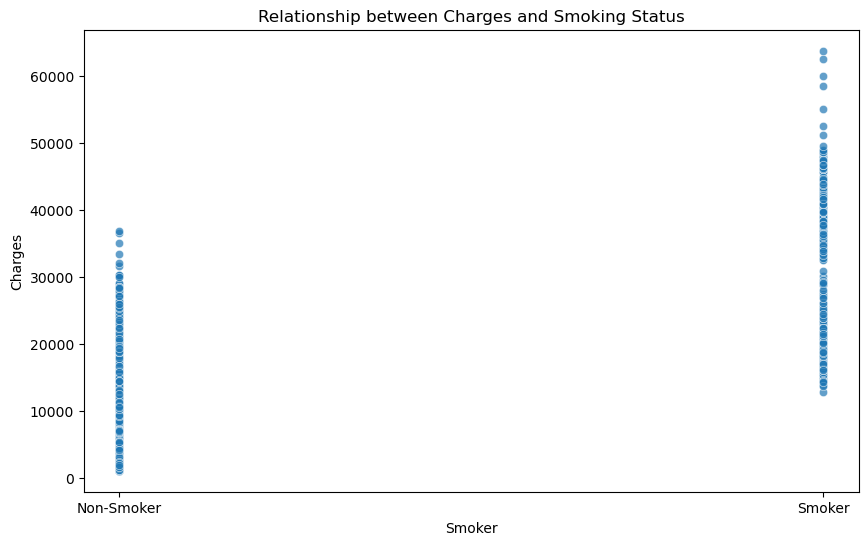

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="smoker", y="charges", data=df, alpha=0.7)
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title("Relationship between Charges and Smoking Status")
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

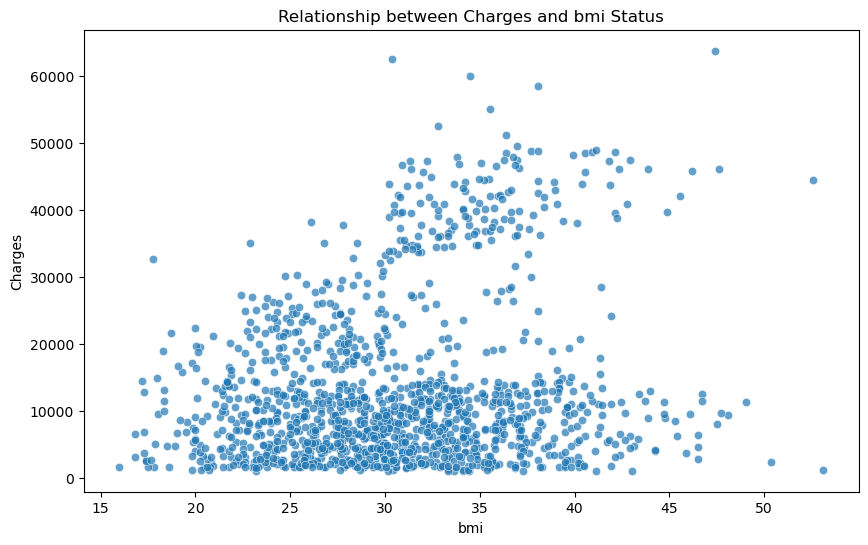

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="bmi", y="charges", data=df, alpha=0.7)
plt.xlabel("bmi")
plt.ylabel("Charges")
plt.title("Relationship between Charges and bmi Status")

plt.show()

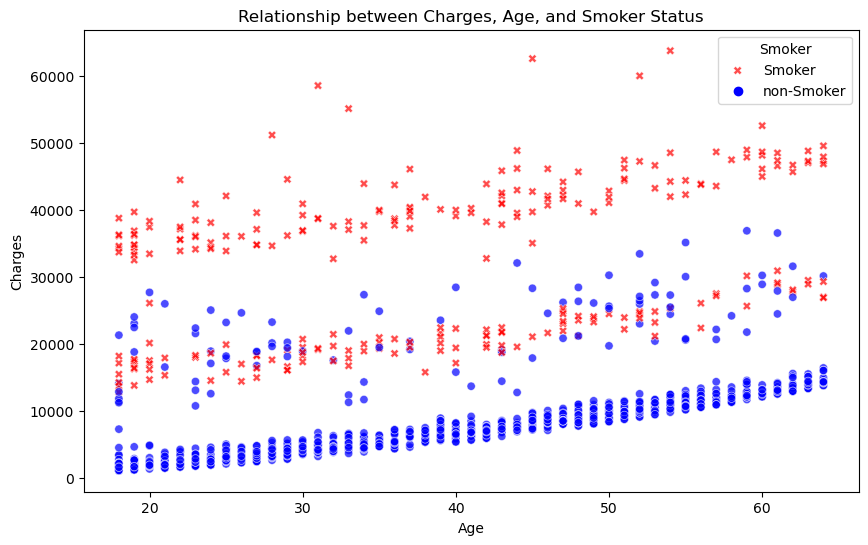

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="charges", hue="smoker", style="smoker",
                data=df, palette={0: "blue", 1: "red"}, alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Relationship between Charges, Age, and Smoker Status")
plt.legend(title="Smoker", labels=["Smoker", "non-Smoker"])
plt.show()

traning model and result

In [17]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df.iloc[:, :3].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regressor = LinearRegression()

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))


print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1) / \
    (len(y_pred)-x_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 4260.560091099394
Mean Squared Error: 34512843.8802279
Root Mean Squared Error: 5874.763304187489
R2 score: 0.7776932310583374
Adjusted R2 score: 0.7751670177749095
